In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
from sklearn.preprocessing import StandardScaler  # It is important to scale the date


#Unsupervised Analysis
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

#Logistic Regression
from sklearn import linear_model

#Neural Network
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy.random as r # We will randomly initialize our weights
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
import tensorflow as tf
from keras import optimizers
from keras import losses
import keras

#SVM
from sklearn import svm

Using TensorFlow backend.


(11000, 901)
(11000,) (11000, 900)


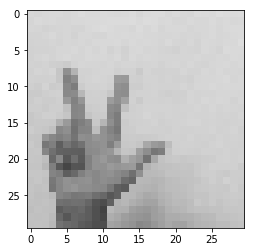

In [2]:
data = pd.read_csv('ASL_data_Numeric_labels_with_empty_backg_30x30_1000samp_number_only.csv')
data = data.dropna()
print(data.shape)
#Convert dataframe data into a numpy array
df = np.array(data.values)
#Select first column for the labels/y
y = df[:,0]
#Select remaining columns as x data(pixel array)
x = df[:,1:]
print(y.shape, x.shape)

sample1 = np.uint8(x[0,:].reshape(30,30))

img = Image.fromarray(sample1)
plt.imshow(img)

# Unsupervised Analysis

c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(11000, 2)


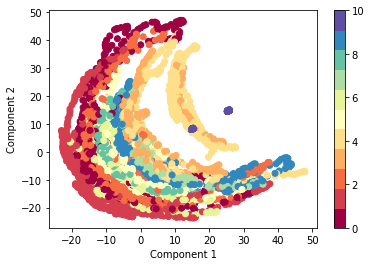

In [3]:
# Unsupervised Analysis-K Means Clustering
X_scale = StandardScaler()
x_unsup = X_scale.fit_transform(x)

#Visualize data in 2 dimensions: preserving maximum data variance
project = PCA(2).fit_transform(x_unsup)  # project from 900 to 2 dimensions
print(project.shape)

plt.scatter(project[:, 0], project[:, 1],
            c=y,cmap=plt.cm.get_cmap('Spectral', 11))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

900
82


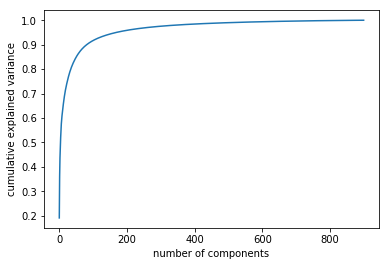

In [4]:
#Explained variance by number of components
pca = PCA().fit(x_unsup)
print(pca.n_components_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

pca = PCA(0.90).fit(x_unsup) 
print(pca.n_components_) #90% of variance explained by 82 components

In [5]:
#Find accuracy and MSE
def statistics(yhat,y):
    mse = np.mean((y-yhat)**2)
    count = 0
    for i in range(len(yhat)):
        if(yhat[i] == y[i]):
            count += 1
    accuracy = count/len(yhat)
    return mse,accuracy

MSE 25.121363636363636
Accuracy 0.055363636363636365
Clustered Labels [10  2  4 ... 10  9  8]
True Labels [ 3  3  4 ...  3  3 10]


Text(0.5, 1.0, 'K-means clustering on the dataset')

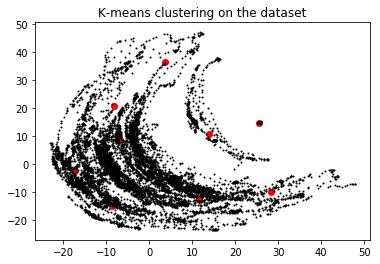

In [12]:
#K-Means clustering with PCA-transformed 2 components of images
#11 cluster for the digits 0-10 inclusive
clusters = KMeans(n_clusters = 11)
clusters.fit_predict(project)

yhat = clusters.labels_
mse, accuracy = statistics(yhat,y)
print("MSE", mse)
print("Accuracy", accuracy)

# Plot the cluster centers and PCA transformed data
plt.plot(project[:,0], project[:,1],'k.', markersize=2)
centers = clusters.cluster_centers_
print("Clustered Labels",clusters.labels_)
print("True Labels", y)
plt.scatter(centers[:, 0], centers[:, 1], color='red')
plt.title('K-means clustering on the dataset')

In [13]:
#K-Means clustering with PCA-transformed 82 components of images
project_82 = PCA(n_components=82).fit_transform(x_unsup)
c = KMeans(n_clusters=11)
c.fit_predict(project_82)

yhat = c.labels_
mse, accuracy = statistics(yhat,y)
print("MSE", mse)
print("Accuracy", accuracy)

MSE 24.265727272727272
Accuracy 0.07863636363636364


In [14]:
#K-Means clustering with PCA-transformed 200 components of images
project_200 = PCA(n_components=200).fit_transform(x_unsup)
c = KMeans(n_clusters=11)
c.fit_predict(project_200)

yhat = c.labels_
mse, accuracy = statistics(yhat,y)
print("MSE", mse)
print("Accuracy", accuracy)

MSE 23.554727272727273
Accuracy 0.047363636363636365


# Logistic Regression - Lasso Regularization

In [5]:
# x_scale = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.3)

acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(C=c,penalty='l1', solver='saga')

    logreg.fit(X_train, Y_train)

    Yhat_train = logreg.predict(X_train)

    acc_train = logreg.score(X_train,Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)

    Yhat_test = logreg.predict(X_test)

    acc_test = logreg.score(X_test,Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)

    c_logreg.append(c)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.517143
Accuracy on test data = 0.509697


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.875974
Accuracy on test data = 0.862727


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.963766
Accuracy on test data = 0.938182


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.970000
Accuracy on test data = 0.944242


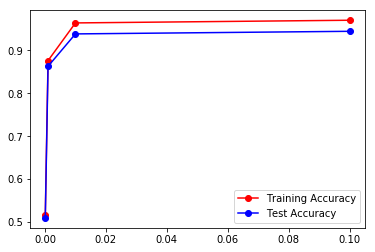

In [6]:
cVals = [0.0001, 0.001, 0.01, 0.1]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
    
plt.plot(c_logreg, acc_train_logreg, 'ro-')
plt.plot(c_logreg, acc_test_logreg,'bo-')


# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# Logistical Regression - Ridge Regression

In [7]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    
    logreg2 = linear_model.LogisticRegression(C=c, warm_start=True)
    
    logreg2.fit(X_train, Y_train)
    
    Yhat_train = logreg2.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg2.append(c)
    

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training data = 0.997013
Accuracy on test data = 0.969697


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training data = 1.000000
Accuracy on test data = 0.974848


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training data = 1.000000
Accuracy on test data = 0.975758


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training data = 1.000000
Accuracy on test data = 0.975758


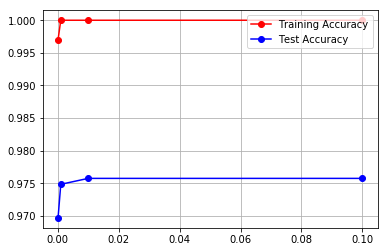

In [8]:
cVals = [0.0001, 0.001, 0.01, 0.1]
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)

plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Logistical Regression - Polynomial Feature Transformation

In [ ]:
poly = PolynomialFeatures(degree=2)

# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit(X_train)
X_transformed_test = poly.fit(X_test)

In [ ]:
# Not enough memory
X_transformed_train = poly.transform(X_train)
X_transformed_test = poly.transform(X_test)

# Support Vector Machine - Linear Kernal

In [12]:
acc_train_svm= []
acc_test_svm = []
c_svm = []


def svm_linear(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c).
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    # Fit the classifier on the training set.
    svc.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm.append(acc_test)
    print('TestAccuracy = {0:f}'.format(acc_test))
    
    c_svm.append(c)   

Train Accuracy = 0.985714
TestAccuracy = 0.976364
Train Accuracy = 0.999481
TestAccuracy = 0.997576
Train Accuracy = 1.000000
TestAccuracy = 0.998485
Train Accuracy = 1.000000
TestAccuracy = 0.998485


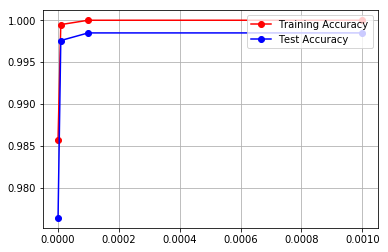

In [13]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
cVals = [0.000001, 0.00001, 0.0001, 0.001]
for c in cVals:
    svm_linear(c)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Support Vector Machine - Radial Basis Function Kernal

In [16]:
acc_train_svm = []
acc_test_svm = []
c_svm= []


# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_RBF(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c).
    svc = svm.SVC(probability = False, kernel = 'rbf', C = c)
    
    # Fit the classifier on the training set.
    svc.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    
    c_svm.append(c)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 0.094026
Accuracy = 0.083636


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 0.094026
Accuracy = 0.083636


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 0.094026
Accuracy = 0.083636


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 0.094026
Accuracy = 0.083636


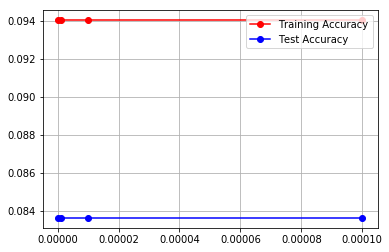

In [17]:
cVals = [0.0000001, 0.000001, 0.00001, 0.0001]

for c in cVals:
    svm_RBF(c)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Support Vector Machine - Polynomial Kernal

In [18]:
acc_train_svm = []
acc_test_svm = []
c_svm= []


def svm_polynomial(c):
    # Create an object of svm classifier using svm.SVC()
    # Pass probability = False, kernel = 'poly' , value of C = c.
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    A = X_train[0:300,:]  # First 300 rows of training set.
    B = Y_train[0:300]  
    C = X_test[0:100,:]   # First 100 rows of test set.
    D = Y_test[0:100]
    
    # Fit the classifier on the training set.
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(A, B)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_polynomial_train = svc_polynomial.predict(A)
    acc_train = np.mean(Yhat_svc_polynomial_train == B)
    acc_train_svm.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_polynomial_test = svc_polynomial.predict(C)
    acc_test = np.mean(Yhat_svc_polynomial_test == D)
    acc_test_svm.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    
    c_svm.append(c)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 1.000000
Accuracy = 0.850000


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 1.000000
Accuracy = 0.850000


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 1.000000
Accuracy = 0.850000


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 1.000000
Accuracy = 0.850000


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 1.000000
Accuracy = 0.850000


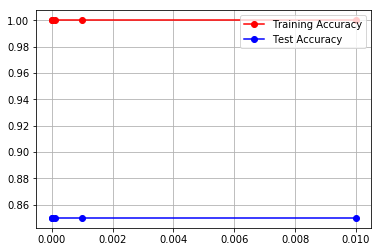

In [19]:
cVals = [0.000001, 0.00001, 0.0001, 0.001, 0.01]

for c in cVals:
    svm_polynomial(c)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Convolutional Neural Network

### Preprocessing of data

In [15]:
#Reinitialize data
#Scaling the features to help the algorithm converge, we will scale the data to have a mean of 0 and unit variance
#Run with original X data once
X_scale = StandardScaler()
x_cnn = X_scale.fit_transform(x)

#Split the data into training and test set.  60% training and 40% test, shuffle data
X_train, X_test, y_train, y_test = train_test_split(x_cnn, y, test_size=0.4,shuffle=True)
x_train = X_train.reshape(X_train.shape[0],30,30,1)
x_test = X_test.reshape(X_test.shape[0],30,30,1)

#Converts a class vector (integers) to binary class matrix.
y_train = keras.utils.to_categorical(y_train, 11)
y_test = keras.utils.to_categorical(y_test, 11)

print(x_train.shape)
print(y_train.shape)

c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(6600, 30, 30, 1)
(6600, 11)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 1ms/step - loss: 0.5939 - acc: 0.8133 - val_loss: 0.0378 - val_acc: 0.9932
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0182 - acc: 0.9962 - val_loss: 0.0056 - val_acc: 0.9998
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 9.2625e-04 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 5.3805e-04 - acc: 1.0000 - val_loss: 5.9751e-04 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 3.4755e-04 - acc: 1.0000 - val_loss: 4.6750e-04 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 2.6192e-04 - acc: 1.0000 - val_loss: 3.6704e-04 - val_acc: 1.0000

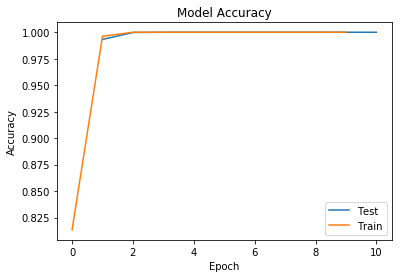

rsq = 0.999996


In [16]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
tmp = np.sum((yhat-y_test)**2)/(np.sum((y_test-y_test.mean())**2))
rsq_test = 1-tmp
print("rsq = {0:f}".format(rsq_test))

### Learning Rate (increased from 0.001 to 0.01)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 2ms/step - loss: 2.8780 - acc: 0.0905 - val_loss: 2.3988 - val_acc: 0.0893
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 2.3992 - acc: 0.0918 - val_loss: 2.3986 - val_acc: 0.0884
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 2.3985 - acc: 0.0868 - val_loss: 2.3988 - val_acc: 0.0882
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 2.3985 - acc: 0.0886 - val_loss: 2.3987 - val_acc: 0.0870
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 2.3985 - acc: 0.0880 - val_loss: 2.3988 - val_acc: 0.0882
Epoch 6/10
6600/6600 [==============================] - 8s 1ms/step - loss: 2.3988 - acc: 0.0850 - val_loss: 2.3987 - val_acc: 0.0895
Epoch 7/10
6600/6600 [==============================] - 7s 1ms/step - loss: 2.3988 - acc: 0.0859 - val_loss: 2.3991 - val_acc: 0.0870
Epoch 8/10
66

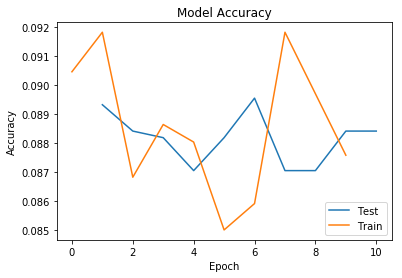

rsq = -0.000240


In [17]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.01
learning_rate = 0.01
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
tmp = np.sum((yhat-y_test)**2)/(np.sum((y_test-y_test.mean())**2))
rsq_test = 1-tmp
print("rsq = {0:f}".format(rsq_test))

### Learning Rate (decreased from 0.001 to 0.0001)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 1ms/step - loss: 1.6824 - acc: 0.5658 - val_loss: 1.0360 - val_acc: 0.7370
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.6663 - acc: 0.8370 - val_loss: 0.3987 - val_acc: 0.9298
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.2815 - acc: 0.9559 - val_loss: 0.1841 - val_acc: 0.9748
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1322 - acc: 0.9867 - val_loss: 0.0895 - val_acc: 0.9916
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0724 - acc: 0.9944 - val_loss: 0.0601 - val_acc: 0.9927
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0407 - acc: 0.9976 - val_loss: 0.0322 - val_acc: 0.9984
Epoch 7/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0247 - acc: 0.9995 - val_loss: 0.0224 - val_acc: 0.9984
Epoch 8/10
66

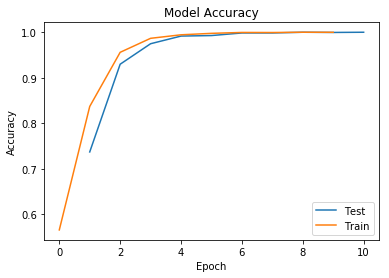

rsq = 0.998734


In [18]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.0001
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
tmp = np.sum((yhat-y_test)**2)/(np.sum((y_test-y_test.mean())**2))
rsq_test = 1-tmp
print("rsq = {0:f}".format(rsq_test))

### Layers (Removed a Convolution and Pooling Layer)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 13s 2ms/step - loss: 0.4978 - acc: 0.8515 - val_loss: 0.0803 - val_acc: 0.9839
Epoch 2/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0190 - acc: 0.9970 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 3/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 9s 1ms/step - loss: 8.8000e-04 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 9s 1ms/step - loss: 6.3738e-04 - acc: 1.0000 - val_loss: 9.3590e-04 - val_acc: 1.0000
Epoch 7/10
6600/6600 [==============================] - 9s 1ms/step - loss: 4.7251e-04 - acc: 1.0000 - val_loss: 7.1110e-04 - val_acc: 

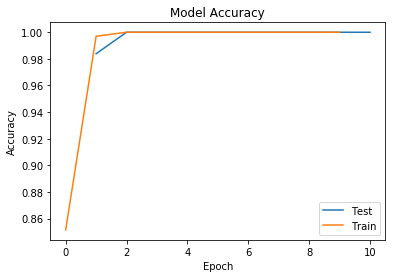

rsq = 0.999978


In [19]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, removed a convolution and pooling layer
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
tmp = np.sum((yhat-y_test)**2)/(np.sum((y_test-y_test.mean())**2))
rsq_test = 1-tmp
print("rsq = {0:f}".format(rsq_test))

### Increased Number of Filters in a Convolution Layer

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 15s 2ms/step - loss: 0.6239 - acc: 0.8127 - val_loss: 0.0395 - val_acc: 0.9895
Epoch 2/10
6600/6600 [==============================] - 11s 2ms/step - loss: 0.0322 - acc: 0.9923 - val_loss: 0.0124 - val_acc: 0.9984
Epoch 3/10
6600/6600 [==============================] - 11s 2ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 6.6480e-04 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 11s 2ms/step - loss: 3.7880e-04 - acc: 1.0000 - val_loss: 3.9180e-04 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 11s 2ms/step - loss: 2.3979e-04 - acc: 1.0000 - val_loss: 2.8553e-04 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 11s 2ms/step - loss: 1.7366e-04 - acc: 1.0000 - val_loss: 2.3067e-04 - val_acc: 1.0000
Epoch 7/10
6600/6600 [==============================] - 11s 2ms/step - loss: 1.3484e-04 - acc: 1.0000 - val_loss: 

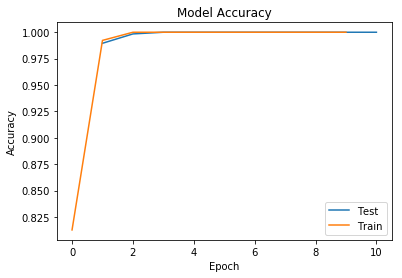

rsq = 0.999992


In [20]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, increased in a convolution layer from 32 to 64 
model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
tmp = np.sum((yhat-y_test)**2)/(np.sum((y_test-y_test.mean())**2))
rsq_test = 1-tmp
print("rsq = {0:f}".format(rsq_test))

### Batch Normalization Regularization

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 26s 4ms/step - loss: 0.2357 - acc: 0.9359 - val_loss: 0.0102 - val_acc: 0.9984
Epoch 2/10
6600/6600 [==============================] - 22s 3ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 3/10
6600/6600 [==============================] - 22s 3ms/step - loss: 7.3308e-04 - acc: 1.0000 - val_loss: 6.8048e-04 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 21s 3ms/step - loss: 4.9458e-04 - acc: 1.0000 - val_loss: 5.0384e-04 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 20s 3ms/step - loss: 3.3119e-04 - acc: 1.0000 - val_loss: 3.9924e-04 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 20s 3ms/step - loss: 2.8254e-04 - acc: 1.0000 - val_loss: 3.3009e-04 - val_acc: 1.0000
Epoch 7/10
6600/6600 [==============================] - 20s 3ms/step - loss: 2.3674e-04 - acc: 1.0000 - val_lo

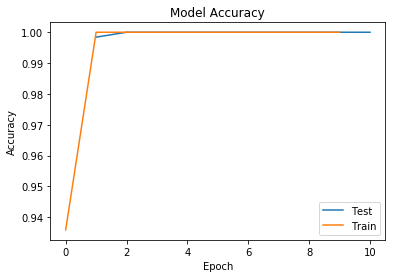

rsq = 0.999998


In [21]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, add Batch normalization
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
tmp = np.sum((yhat-y_test)**2)/(np.sum((y_test-y_test.mean())**2))
rsq_test = 1-tmp
print("rsq = {0:f}".format(rsq_test))